In [67]:
# IMPORTS
from IPython.display import Image
import numpy as np
import pandas as pd

from random import randint


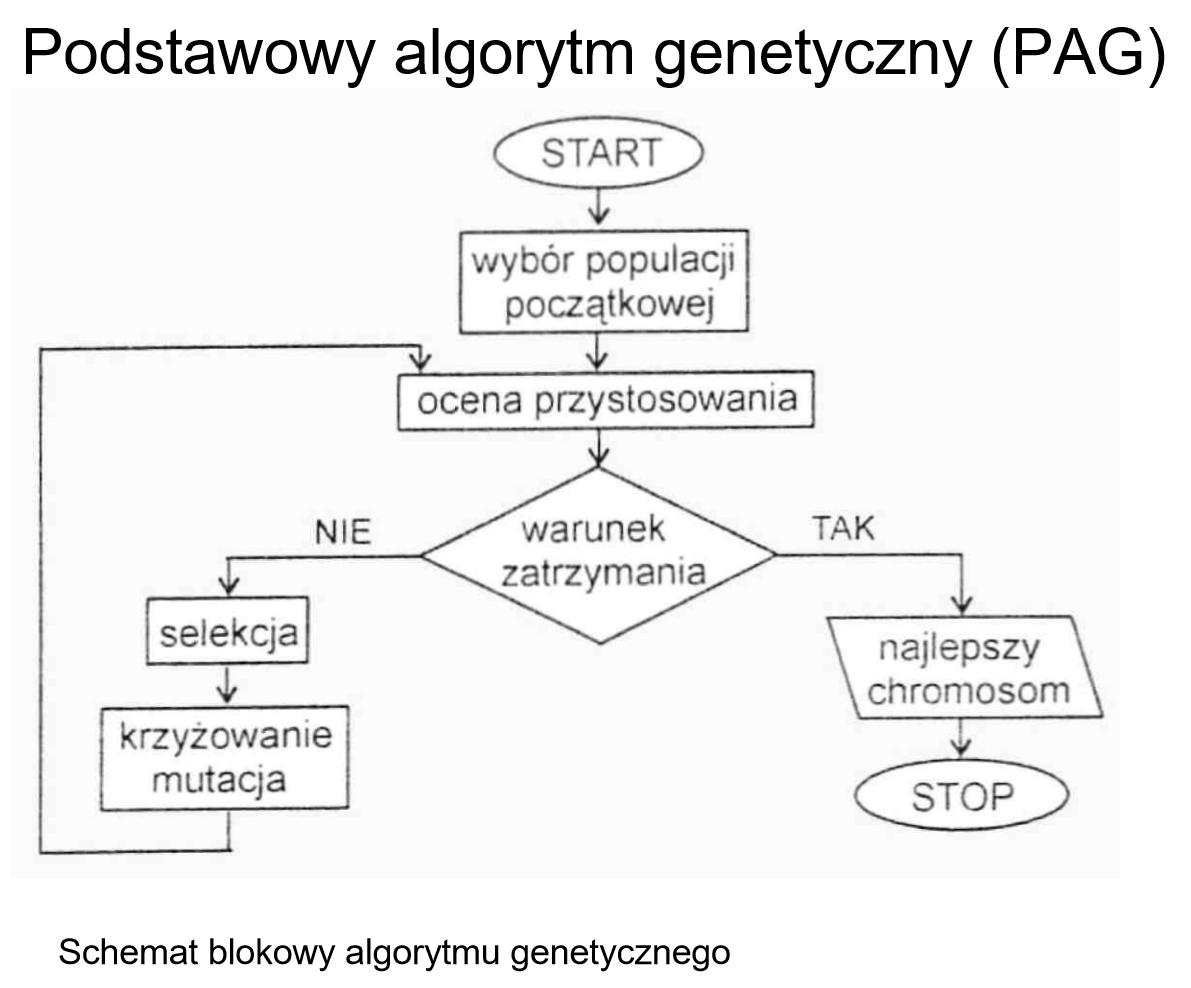

In [68]:
Image("img/PAG-schemat.PNG")

## 1. WYBÓR POPULACJI POCZĄTKOWEJ
#### -Populacja składa się z n punktów przestrzeni poszukiwań X (funkcja rand)
### f(x) = 2(x^2+1), gdzie x E <1...127>

In [69]:
populationCnt = 100 #rozmiar populacji
M = np.zeros(populationCnt).astype(int)
xMin = 1
xMax = 127
for x in range(populationCnt):
    M[x] = randint(xMin,xMax)
    #2*(randint(xMin,xMax)+1)
print(M)

print("\nPOSORTOWANE:")
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

selection_sort(M)
print(M)

[ 79  86  32   7  80 121  86   7  68  34  87  97   3 105  38  93 103  74
  53  53  34  87  62  72  53  84  65  18 100  68 103 127   2  28  76  56
  81  66  64  21 123 107  89  17  92  42 126 112 101  72 106  11   9  24
  59  84  89  12 109  75  30  77  58  44  22  52   1  19  27  73  12  28
  19  10  52  76  31  87  76  46  31  96 111 107  40  19  97 107  28 126
 126 123  48  33  78 116  19  69  13  73]

POSORTOWANE:
[  1   2   3   7   7   9  10  11  12  12  13  17  18  19  19  19  19  21
  22  24  27  28  28  28  30  31  31  32  33  34  34  38  40  42  44  46
  48  52  52  53  53  53  56  58  59  62  64  65  66  68  68  69  72  72
  73  73  74  75  76  76  76  77  78  79  80  81  84  84  86  86  87  87
  87  89  89  92  93  96  97  97 100 101 103 103 105 106 107 107 107 109
 111 112 116 121 123 123 126 126 126 127]


In [77]:
class Gen:
    def __init__(self,val):
        self.value = val
        self.cnt = 1
        self.adaptation = 2* (self.value*self.value +1) # ocena przystosowania
    def printBin(self):
        return bin(self.value)[2:].zfill(8) 
    def printAllInfo(self):
        return str("0b"+self.printBin()+" ("+str(self.value)+") cnt="+ str(self.cnt) + " adaptation: "+str(self.adaptation))


In [84]:
genotypeSum = 0

# def sorted_array_group(x, genotypeSum):
t_genList = []
t_genList.append(Gen(-1))
for i in M:
    if i == t_genList[-1].value:
        t_genList[-1].cnt = t_genList[-1].cnt + 1
    else:
        t_genList.append(Gen(i))
        genotypeSum = genotypeSum + Gen(i).adaptation
del t_genList[0]
for i in t_genList:
    print(i.printAllInfo())
        
genGroup = t_genList
#  sorted_array_group(M, genotypeSum)

genotypeCnt = len(genGroup)
print("genotypeCnt = " + str(genotypeCnt))
print("genotypeSum = " + str(genotypeSum))



0b00000001 (1) cnt=1 adaptation: 4
0b00000010 (2) cnt=1 adaptation: 10
0b00000011 (3) cnt=1 adaptation: 20
0b00000111 (7) cnt=2 adaptation: 100
0b00001001 (9) cnt=1 adaptation: 164
0b00001010 (10) cnt=1 adaptation: 202
0b00001011 (11) cnt=1 adaptation: 244
0b00001100 (12) cnt=2 adaptation: 290
0b00001101 (13) cnt=1 adaptation: 340
0b00010001 (17) cnt=1 adaptation: 580
0b00010010 (18) cnt=1 adaptation: 650
0b00010011 (19) cnt=4 adaptation: 724
0b00010101 (21) cnt=1 adaptation: 884
0b00010110 (22) cnt=1 adaptation: 970
0b00011000 (24) cnt=1 adaptation: 1154
0b00011011 (27) cnt=1 adaptation: 1460
0b00011100 (28) cnt=3 adaptation: 1570
0b00011110 (30) cnt=1 adaptation: 1802
0b00011111 (31) cnt=2 adaptation: 1924
0b00100000 (32) cnt=1 adaptation: 2050
0b00100001 (33) cnt=1 adaptation: 2180
0b00100010 (34) cnt=2 adaptation: 2314
0b00100110 (38) cnt=1 adaptation: 2890
0b00101000 (40) cnt=1 adaptation: 3202
0b00101010 (42) cnt=1 adaptation: 3530
0b00101100 (44) cnt=1 adaptation: 3874
0b0010111

In [85]:
data = {}
for i in range(genotypeCnt):
    data[str(i)]= [genGroup[i].printBin(),genGroup[i].value, genGroup[i].adaptation,genGroup[i].adaptation/genotypeSum]
a = pd.DataFrame.from_dict(data,columns = ['Bin', 'Dec', 'Gain', '%'], orient='index') #,keys=keys )
gainSum=0
for index, row in a.iterrows():
    gainSum+=row.values[2]

for index, row in a.iterrows():
    print(str(row.values[2])+"  "+str(gainSum)+"  "+str(row.values[2]/gainSum))
    row.values[3]=(row.values[2]/gainSum)
#     gainSum+=row.values[2]
#     print(row.values[2])
# print(a)

AAAA
726426
4  726426  5.506410838819095e-06
10  726426  1.3766027097047738e-05
20  726426  2.7532054194095477e-05
100  726426  0.00013766027097047737
164  726426  0.0002257628443915829
202  726426  0.0002780737473603643
244  726426  0.0003358910611679648
290  726426  0.0003992147858143844
340  726426  0.0004680449212996231
580  726426  0.0007984295716287688
650  726426  0.000894791761308103
724  726426  0.0009966603618262561
884  726426  0.00121691679537902
970  726426  0.0013353046284136306
1154  726426  0.001588599526999309
1460  726426  0.0020098399561689698
1570  726426  0.002161266254236495
1802  726426  0.0024806380828880023
1924  726426  0.002648583613471985
2050  726426  0.0028220355548947865
2180  726426  0.003000993907156407
2314  726426  0.0031854586702568465
2890  726426  0.003978381831046796
3202  726426  0.004407881876474686
3530  726426  0.004859407565257851
3874  726426  0.005332958897396294
4234  726426  0.005828535872890012
4610  726426  0.0063461384917390075
5410  7

In [86]:
    # data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}

    print(data)
    
                #, 1,0.2]
#     data[str(i)]= ['Bin': int(genGroup[i].value), 'Dec': [0],  'Przyst': [0], 'Procent': [0.1]]

#     data[str(i)]= {'Bin': int(genGroup[i].value), 'Dec': [0],  'Przyst': [0], 'Procent': [0.1]} 


{'0': ['00000001', 1, 4, 5.506410838819095e-06], '1': ['00000010', 2, 10, 1.3766027097047738e-05], '2': ['00000011', 3, 20, 2.7532054194095477e-05], '3': ['00000111', 7, 100, 0.00013766027097047737], '4': ['00001001', 9, 164, 0.0002257628443915829], '5': ['00001010', 10, 202, 0.0002780737473603643], '6': ['00001011', 11, 244, 0.0003358910611679648], '7': ['00001100', 12, 290, 0.0003992147858143844], '8': ['00001101', 13, 340, 0.0004680449212996231], '9': ['00010001', 17, 580, 0.0007984295716287688], '10': ['00010010', 18, 650, 0.000894791761308103], '11': ['00010011', 19, 724, 0.0009966603618262561], '12': ['00010101', 21, 884, 0.00121691679537902], '13': ['00010110', 22, 970, 0.0013353046284136306], '14': ['00011000', 24, 1154, 0.001588599526999309], '15': ['00011011', 27, 1460, 0.0020098399561689698], '16': ['00011100', 28, 1570, 0.002161266254236495], '17': ['00011110', 30, 1802, 0.0024806380828880023], '18': ['00011111', 31, 1924, 0.002648583613471985], '19': ['00100000', 32, 2050,

In [87]:
# import` numpy


# df = pd.DataFrame( columns = [('Bin','int32'), ('Dec','int32'),  ('Przyst','int32'), ('Procent','float32')])

data = {'Bin': [0], 'Dec': [0],  'Przyst': [0], 'Procent': [0.1]} 
data2 = data
data2.append(data)
data2.append(data)
print(data2)

    
# Convert the dictionary into DataFrame 
df2 = pd.DataFrame(data, columns = ['Bin', 'Dec', 'Przyst', 'Procent']) 

print(df2)
# df.append(df2)
# df.append(1,1,1,2.2)
# df.append(pd.DataFrame(1,1,1,1,1))
#                   ['Name', 'Age', 'Stream', 'Percentage']) 


# a = genotypeCnt
# dtype = [('Bin','int32'), ('Dec','int32'),  ('Przyst','int32'), ('Procent','float32')]
# values = np.zeros(a, dtype=dtype)
# index = ['Gen'+str(i) for i in range(1, len(values)+1)]

# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])

# df = pandas.DataFrame(values, index=index)
# print(df)


AttributeError: 'dict' object has no attribute 'append'

In [ ]:
data = {'Bin': [0], 'Dec': [0],  'Przyst': [0], 'Procent': [0.1]} 

dict_obj = {}
print(type(dict_obj))
dict_obj[1]=data
dict_obj[2]=data
dict_obj[3]=data

# dict_obj.append(1, data) 

print(dict_obj)

In [ ]:
# Population = 
# bin, dec, przystosowanie, procent
PopulationTable =  np.zeros((genotypeCnt,4)).astype(int)
from IPython.display import display
display(PopulationTable)  # OR
